# Data visualisation with python


In [3]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
# do not display the number with scientific notation
pd.options.display.float_format = '{:.2f}'.format

In [5]:
# import cleaned versions of files

# orderlines_cl.csv
url = 'https://drive.google.com/file/d/1lrSr_vVbXN7QSVSScf68DpWwvCMclK5m/view?usp=sharing' 
path = 'https://drive.google.com/uc?export=download&id='+url.split('/')[-2]
orderlines = pd.read_csv(path)

# orders_cl.csv
url = 'https://drive.google.com/file/d/1cGjJ9o3vtwjK0Sohyr3YVTccXfnTPijT/view?usp=sharing' 
path = 'https://drive.google.com/uc?export=download&id='+url.split('/')[-2]
orders = pd.read_csv(path)

# brands_cl.csv
url = 'https://drive.google.com/file/d/1XGyabaa4mAkjixMk3XPgx_14OoSse3rs/view?usp=sharing' 
path = 'https://drive.google.com/uc?export=download&id='+url.split('/')[-2]
brands = pd.read_csv(path)

# products_cl.csv
url = 'https://drive.google.com/file/d/1rHC8M-HG13FtVncImXBydgDtIHyCPH0g/view?usp=sharing' 
path = 'https://drive.google.com/uc?export=download&id='+url.split('/')[-2]
products = pd.read_csv(path)

In [6]:
products.isna().sum()

sku                         0
name                        0
desc                        7
price                     587
type                       50
max_price_orderlines    10237
dtype: int64

In [7]:
orderlines.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 293743 entries, 0 to 293742
Data columns (total 9 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   id                293743 non-null  int64  
 1   id_order          293743 non-null  int64  
 2   product_id        293743 non-null  int64  
 3   product_quantity  293743 non-null  int64  
 4   sku               293743 non-null  object 
 5   unit_price        293743 non-null  float64
 6   date              293743 non-null  object 
 7   total_price       293743 non-null  float64
 8   check_orders      293743 non-null  bool   
dtypes: bool(1), float64(2), int64(4), object(2)
memory usage: 18.2+ MB


In [8]:
orders['created_date'] = pd.to_datetime(orders['created_date'])
orderlines['date'] = pd.to_datetime(orderlines['date'])

In [9]:
products['price'].mean()

667.3462680144115

In [10]:
products.dtypes

sku                      object
name                     object
desc                     object
price                   float64
type                     object
max_price_orderlines    float64
dtype: object

In [11]:
products.shape

(10579, 6)

## Company revenue

First I will need to filter only the orders that have a completed state: 

In [12]:
orders_compl = orders.query('state == "Completed"')

Before we create a visualisation, we always need to prepare our dataframe: 

In [13]:
p_df = (
orders_compl
    # create two new columns in our dataframe; year and month
    .assign(year = orders['created_date'].dt.strftime('%Y'), 
           month = orders['created_date'].dt.strftime('%b'))
    # get the total paid by each year and month
    .groupby(['year','month'])
    .agg({'total_paid':'sum'})
    # reset the index to user the column vector in our plot
    .reset_index()
    .sort_values('total_paid', ascending=False)
)
p_df

,year,month,total_paid
9,2017,Nov,2949487.12
13,2018,Jan,1960839.27
2,2017,Dec,1897507.75
4,2017,Jan,1191437.34
5,2017,Jul,1127172.80
10,2017,Oct,1087801.23
12,2018,Feb,1069705.72
11,2017,Sep,861186.73
1,2017,Aug,722055.81
6,2017,Jun,690049.94


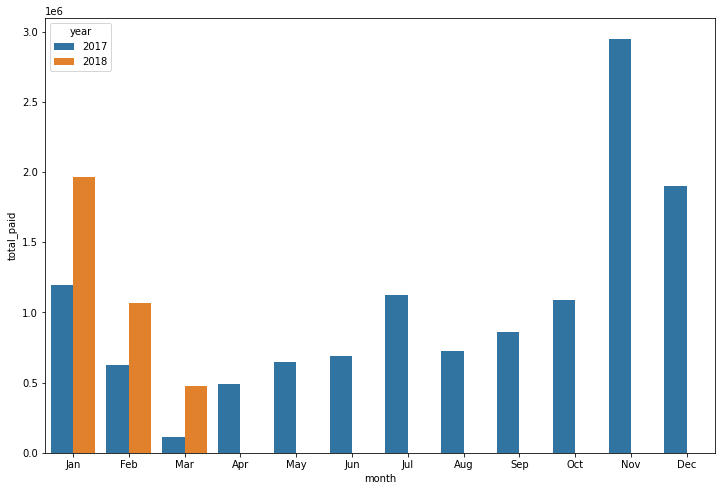

In [14]:
import matplotlib.pyplot as plt

# Create a list with the months sorted from January to December
# It is going to help us sort our columns appropriately
months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 
          'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

# define the size of the plot
# using matplotlib (plt), which operates together with seaborn
plt.subplots(figsize=(12, 8))

p = sns.barplot(
    data=p_df, # dataframe we will use to look for the columns information
    x='month', # x values on our chart
    y='total_paid', # y values on our chart
    hue='year', # group color in our chart
    order=months # order x columns
)

Once we have the main plot, in this case `p`, we can add additional elements to it. For example, a horizontal line (using `axhline`).

We can also use `plt` to define other elements of the plot such as the title, the labels of the axis or the style:

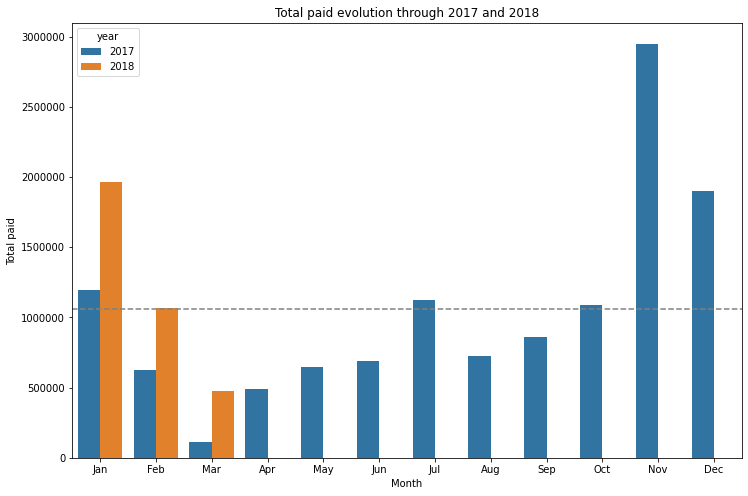

In [15]:
# our main plot
plt.subplots(figsize=(12, 8))

p = sns.barplot(
    data=p_df, # dataframe we will use to look for the columns information
    x='month', # x values on our chart
    y='total_paid', # y values on our chart
    hue='year', # group color in our chart
    order=months # order x columns
)

# add a horizontal reference line into the chart to know where the mean value will be
p.axhline(
    p_df['total_paid'].mean(), # value where you want to add your reference line
    linestyle='--', # type of line you would like to see on the plot. You can find more informaiton on its documentation
    color='gray'
)

plt.xlabel('Month') # x label name
plt.ylabel('Total paid') # y label name
plt.title('Total paid evolution through 2017 and 2018') # title
plt.ticklabel_format(style='plain', axis='y') # remove scientific notation for the y axis
plt.show() # show the plot

### Revenue distribution by order id

I would like to know more about the different values of `total_paid` for each order by month.

Let's talk more about this concept: 

In [16]:
p_df = (
orders_compl
    # create year and month
    .assign(year = orders['created_date'].dt.strftime('%Y'), 
           month = orders['created_date'].dt.strftime('%b'))
)
p_df

,order_id,created_date,total_paid,state,check_orders,year,month
1,241423,2017-11-06 13:10:02,136.15,Completed,True,2017,Nov
2,242832,2017-12-31 17:40:03,15.76,Completed,True,2017,Dec
3,243330,2017-02-16 10:59:38,84.98,Completed,True,2017,Feb
5,245275,2017-06-28 11:35:37,149.00,Completed,True,2017,Jun
6,245595,2017-01-21 12:52:47,112.97,Completed,True,2017,Jan
...,...,...,...,...,...,...,...
204403,527042,2018-03-14 11:47:50,18.98,Completed,True,2018,Mar
204423,527070,2018-03-14 11:50:48,24.97,Completed,True,2018,Mar
204426,527074,2018-03-14 11:51:42,24.97,Completed,True,2018,Mar
204444,527096,2018-03-14 11:58:40,34.96,Completed,True,2018,Mar


If we create a barplot directly: 

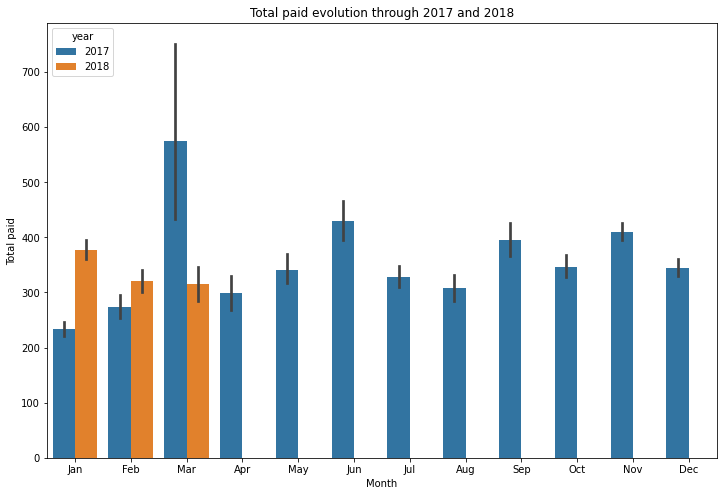

In [17]:
plt.subplots(figsize=(12, 8))

sns.barplot(data=p_df, x='month', y='total_paid', hue='year', order=months)

plt.xlabel('Month')
plt.ylabel('Total paid')
plt.title('Total paid evolution through 2017 and 2018')
plt.ticklabel_format(style='plain', axis='y')
plt.show()

A better way to see the distribution by month would be to use another type of chart; the boxplot. 

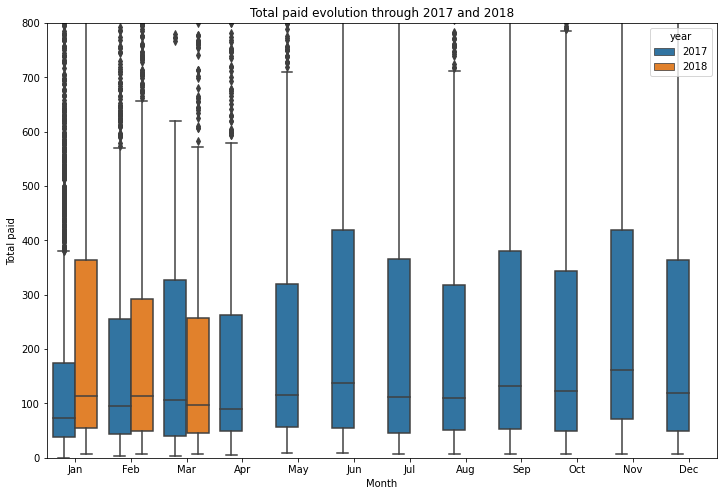

In [18]:
plt.subplots(figsize=(12, 8))

sns.boxplot(data=p_df, 
            x='month', 
            y='total_paid', 
            hue='year', 
            order=months)

plt.ylim(0, 800) # define a limit to put focus on your chart
plt.xlabel('Month')
plt.ylabel('Total paid')
plt.title('Total paid evolution through 2017 and 2018')
plt.ticklabel_format(style='plain', axis='y')
plt.show()

In [19]:
(
p_df
    # select this 3 columns
    .filter(['year','month','total_paid'])
    # apply the describe function to this two groups
    .groupby(['year','month'])
    .describe()
)

total_paid                                                 
                count   mean     std  min   25%    50%    75%      max
year month                                                            
2017 Apr      1632.00 298.38  614.30 4.99 49.99  89.99 262.98  9423.90
     Aug      2350.00 307.26  599.39 7.78 51.10 109.99 317.23 10586.97
     Dec      5506.00 344.63  585.87 6.98 49.98 119.98 362.97  6657.46
     Feb      2273.00 274.48  520.73 3.99 42.98  94.97 254.98  4163.98
     Jan      5111.00 233.11  522.33 0.00 37.93  72.96 174.98  7230.97
     Jul      3438.00 327.86  602.56 7.48 44.98 110.97 365.99  7216.77
     Jun      1603.00 430.47  752.93 8.89 54.98 137.98 419.98  6698.00
     Mar       202.00 573.95 1208.63 2.82 39.99 106.98 326.74  9987.76
     May      1892.00 341.52  594.72 8.98 56.25 115.00 318.96  5335.00
     Nov      7187.00 410.39  683.62 6.53 71.48 161.23 418.98 13387.78
     Oct      3135.00 346.99  610.90 6.98 49.98 122.24 344.07  6227.77
     Sep      2180.00 395.04  682.26 6.98 52.20 131.78 380.38  7376.58
2018 Feb      3334.00 320.85  587.50 6.98 49.98 113.97 292.98  6034.97
     Jan      5202.00 376.94  665.62 6.48 53.99 112.97 362.99  7268.58
     Mar      1515.00 314.77  633.07 6.98 44.98  96.98 258.04  6656.98

As you can see, most of our transactions have monthly median values around 100, but maximum values go up to 10,000 and the standard deviation is huge. So we have very different types of customers. 

A possible hypothesis is that we have a large group of low-paying customers who are end-users and a small group of 'whale' customers who are companies. What's your hypothesis?

### Revenue: zoom in January

We can zoom into the distribution of one month by filtering one month in our dataset:

In [20]:
p_df_jan = p_df.query('month == "Jan"')

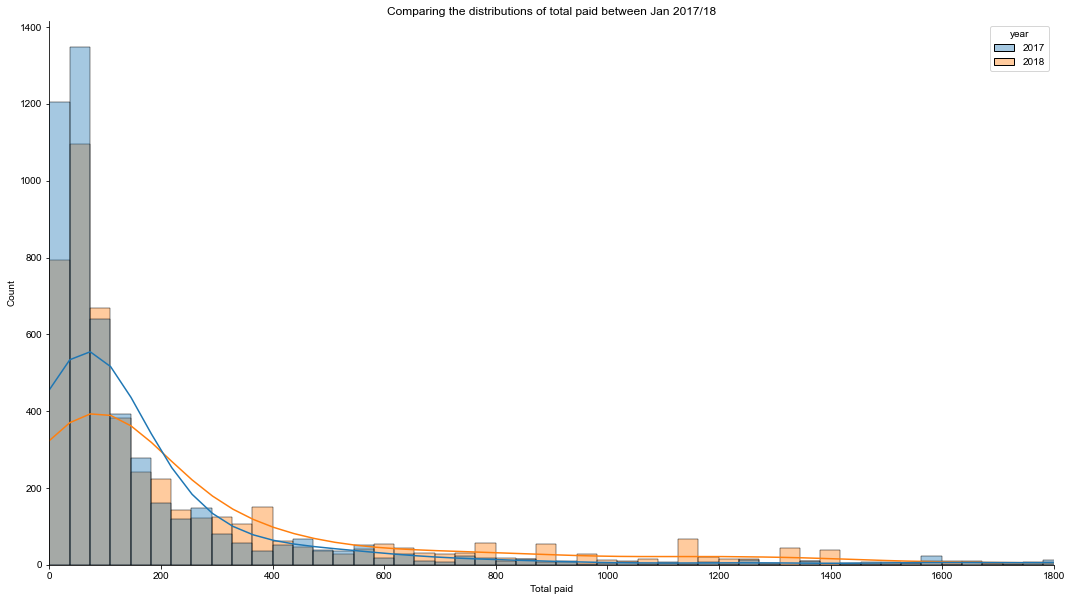

In [21]:
plt.subplots(figsize=(18, 10))

sns.histplot(data=p_df_jan, x='total_paid', hue='year', 
             alpha=.4, # add transparency to you chart/legend
             kde=True, # add a density line in the histogram
             bins=200 # define the number of bins the variable total paid will be grouped
            )
sns.set_style("darkgrid")

plt.xlim(0, 1800)
plt.title('Comparing the distributions of total paid between Jan 2017/18')
plt.xlabel('Total paid')
sns.despine() # remove the top and right margin, to make your plot prettier 
sns.set_style("white")


Looking at these distributions, we can see that in 2017 there were more orders with a smaller `total_paid`, while in 2018 we observe several spikes between 1000 and 1500, indicating that there were more expensive orders.

Let's check this hypothesis: 

In [22]:
p_df_jan.groupby('year').agg({'total_paid':['mean','median','std']})

total_paid              
           mean median    std
year                         
2017     233.11  72.96 522.33
2018     376.94 112.97 665.62

My theory is confirmed when we aggregate the data. The standard deviation for 2018 also shows us that there is a higher dispersion compared to 2017, caused mainly but these orders around 1250 euros.

Let's see if we can zoom in into the products information for January. 

In [23]:
# we already have the completed orders for January of both years in our p_df_jan, 
# let's locate them on the orderlines dataset:

p_sku_jan = (
orderlines
    .loc[orderlines['id_order'].isin(p_df_jan['order_id'])] # filter all the orders id in orderlines for month of january (2017 and 2018)
    .assign(year = orderlines['date'].dt.strftime('%Y')) # create year column
    .groupby(['year','sku']) # group by year and sku
    .agg({'unit_price':'sum'}) # aggregate using the sum of the "unit price"
    .reset_index() # reset index so "year" and "sku" become columns
    .sort_values('unit_price', ascending=False) # order by "unit price" to get top products
    .groupby('year') # group by year because we want the top products for each year
    .head(10) # get the first 10 products for each year
)
p_sku_jan

,year,sku,unit_price
2370,2018,APP2490,57099.45
2371,2018,APP2491,50301.34
2255,2018,APP2074,50154.26
2369,2018,APP2489,45337.70
2373,2018,APP2492,38541.00
2425,2018,APP2637,35826.00
3456,2018,PAC2119,25979.77
2256,2018,APP2075,23829.55
1323,2017,PAC1240,21966.00
3463,2018,PAC2136,20970.90


We can now merge these top 10 products from each year (coming from orderlines) with the products dataset, so that we can can obtain the names of those products:

In [24]:
p_sku_jan = p_sku_jan.merge(products, how='left')
p_sku_jan

,year,sku,unit_price,name,desc,price,type,max_price_orderlines
0,2018,APP2490,57099.45,Apple iPhone 64GB X Silver,New Apple iPhone 64GB Free Silver X,NaN,113271716,1159.00
1,2018,APP2491,50301.34,Apple iPhone X 256GB Space Gray,New Apple iPhone X 256GB Free Space Gray,NaN,113271716,1329.00
2,2018,APP2074,50154.26,"Apple MacBook Pro 15 ""Core i7 Touch Bar 28GHz ...",New MacBook Pro 15-inch Touch Bar to 28GHz Cor...,2805.59,"1,02E+12",NaN
3,2018,APP2489,45337.70,Apple iPhone 64GB Space Gray X,New Free iPhone 64GB X,1159.00,113271716,NaN
4,2018,APP2492,38541.00,Apple iPhone X 256GB Silver,New Apple iPhone X 256GB Silver Free,NaN,113271716,1329.00
5,2018,APP2637,35826.00,"Apple iMac Pro 27 ""8-core Intel Xeon W 32GHz |...",Pro iMac 27 inch screen Retina 5K and Intel Xe...,5499.00,118692158,NaN
6,2018,PAC2119,25979.77,"Apple iMac 27 ""Core i7 Retina 5K 42GHz | 32GB ...",IMac desktop computer 27 inch Retina 5K RAM 32...,3799.00,"5,74E+15",NaN
7,2018,APP2075,23829.55,"Apple MacBook Pro 15 ""Core i7 Touch Bar 29Ghz ...",New MacBook Pro 15-inch Core i7 Touch Bar 29Gh...,3305.59,"1,02E+12",NaN
8,2017,PAC1240,21966.00,"Apple MacBook Pro 133 ""i5 25GHz | RAM 16GB | 5...",Apple MacBook Pro 133 inches (MD101Y / A) with...,1899.00,1282,NaN
9,2018,PAC2136,20970.90,"Apple iMac 27 ""Core i5 Retina 5K 34GHz | 16GB ...",IMac desktop computer 27 inch 5K Retina 16GB (...,2339.00,"5,74E+15",NaN


Time to visualize the products:

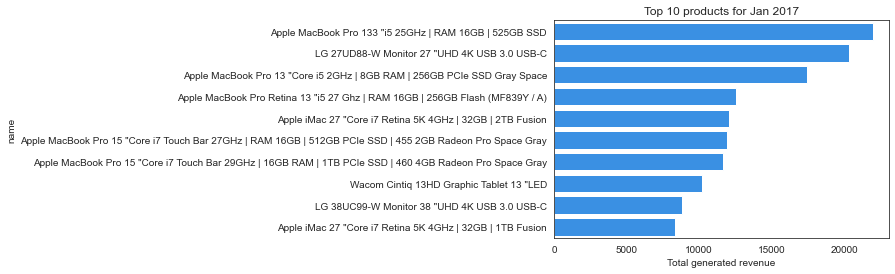

In [25]:
# data for 2017
year = "2017"
data_2017 = p_sku_jan.loc[p_sku_jan['year'] == year]

# plot for 2017
sns.barplot(data= data_2017, 
            x='unit_price', 
            y='name',
            color='dodgerblue')

plt.title('Top 10 products for Jan ' + year)
plt.xlabel('Total generated revenue')
plt.show()

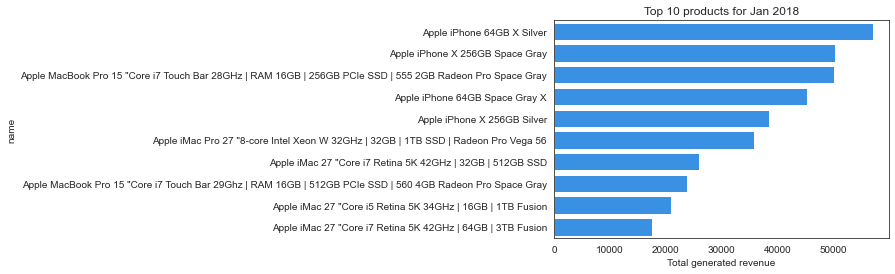

In [26]:
# data for 2018
year = "2018"
data_2018 = p_sku_jan.loc[p_sku_jan['year'] == year]

# plot for 2018
sns.barplot(data= data_2018, 
            x='unit_price', 
            y='name',
            color='dodgerblue')

plt.title('Top 10 products for Jan ' + year)
plt.xlabel('Total generated revenue')
plt.show()

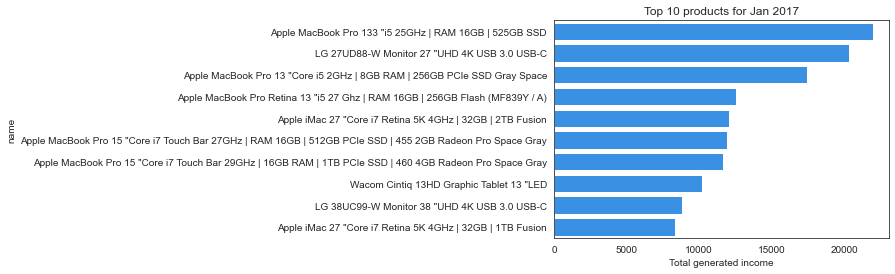

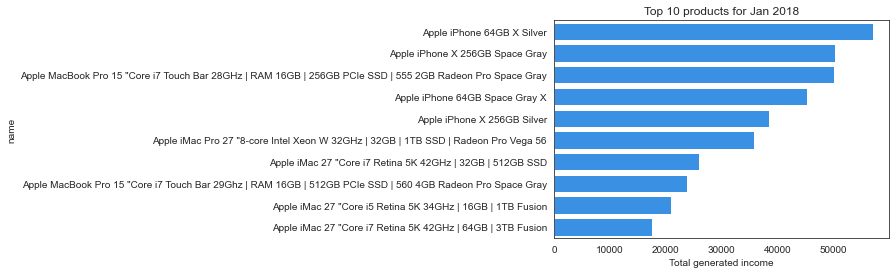

In [27]:
for year in ['2017', '2018']:
    temp = p_sku_jan.loc[p_sku_jan['year'] == year]
    sns.barplot(data=temp, x='unit_price', y='name', color='dodgerblue')
    plt.title('Top 10 products for Jan ' + year)
    plt.xlabel('Total generated income')
    plt.show()

The [product mix](https://en.wikipedia.org/wiki/Marketing_mix) of the company has changed across the two years.

Answer the following questions with the chart you consider most suitable: 

1. Only a fraction of the total number of orders end up being completed. Let's call this fraction (Completed orders / Total number of orders) 'Orders Conversion Rate, OCR'. Can you plot the weekly evolution of the 'Orders Conversion Rate'? Find the best chart to represent it. 

In [28]:
completed_order = orders.assign(year = orders['created_date'].dt.strftime('%Y'), 
                                week = orders['created_date'].dt.strftime('%W'))\
                        .groupby(['year', 'week', 'state'])\
                        .agg(cnt=('order_id','count')) 
                        
completed_order.head(20)

cnt
year week state                
2017 00   Cancelled          16
          Completed         109
          Pending             8
          Place Order        77
          Shopping Basket   290
     01   Cancelled         172
          Completed        1253
          Pending           107
          Place Order       616
          Shopping Basket  2409
     02   Cancelled         113
          Completed        1296
          Pending           114
          Place Order       677
          Shopping Basket  2204
     03   Cancelled         107
          Completed         957
          Pending            82
          Place Order       480
          Shopping Basket  1474

In [29]:
comp_orders = orders[orders['state'] == 'Completed'].assign(year = orders['created_date'].dt.strftime('%Y'), 
                                                            week = orders['created_date'].dt.strftime('%W'))\
                                                     .groupby(['year', 'week'])['order_id'].count().reset_index()
comp_orders.rename(columns={'order_id':'number_com'}, inplace=True)
comp_orders.head(20)

,year,week,number_com
0,2017,00,109
1,2017,01,1253
2,2017,02,1296
3,2017,03,957
4,2017,04,1040
5,2017,05,905
6,2017,06,698
7,2017,07,799
8,2017,08,305
9,2017,09,44


In [30]:
comp_orders.shape

(64, 3)

In [31]:
total_orders = orders.assign(year = orders['created_date'].dt.strftime('%Y'), 
                             week = orders['created_date'].dt.strftime('%W'))\
                     .groupby(['year', 'week'])['order_id'].count().reset_index()
total_orders.rename(columns={'order_id':'num_total'}, inplace=True)
total_orders.head(20)

,year,week,num_total
0,2017,00,500
1,2017,01,4557
2,2017,02,4404
3,2017,03,3100
4,2017,04,3162
5,2017,05,2981
6,2017,06,2718
7,2017,07,3013
8,2017,08,2771
9,2017,09,2694


In [32]:
total_orders.dtypes

year         object
week         object
num_total     int64
dtype: object

In [33]:
total_orders.shape

(64, 3)

In [34]:
joint_order = pd.merge(comp_orders, total_orders, on=['year', 'week'])
joint_order.sample(30)

,year,week,number_com,num_total
40,2017,40,638,2802
28,2017,28,850,2923
8,2017,08,305,2771
37,2017,37,407,2243
55,2018,03,947,4345
44,2017,44,777,2601
57,2018,05,1118,4882
0,2017,00,109,500
49,2017,49,662,4296
45,2017,45,811,3363


In [35]:
joint_order['OCR'] = (joint_order['number_com'] / joint_order['num_total']) * 100

In [36]:
# joint_order = joint_order.drop('level_0', axis=1)
joint_order

,year,week,number_com,num_total,OCR
0,2017,00,109,500,21.80
1,2017,01,1253,4557,27.50
2,2017,02,1296,4404,29.43
3,2017,03,957,3100,30.87
4,2017,04,1040,3162,32.89
...,...,...,...,...,...
59,2018,07,973,3704,26.27
60,2018,08,737,3034,24.29
61,2018,09,916,3296,27.79
62,2018,10,753,4179,18.02


In [37]:
joint_order.dtypes

year           object
week           object
number_com      int64
num_total       int64
OCR           float64
dtype: object

In [38]:
joint_order[joint_order['year'] == '2018']

,year,week,number_com,num_total,OCR
53,2018,01,1381,5695,24.25
54,2018,02,1231,5349,23.01
55,2018,03,947,4345,21.80
56,2018,04,914,4258,21.47
57,2018,05,1118,4882,22.90
58,2018,06,788,3488,22.59
59,2018,07,973,3704,26.27
60,2018,08,737,3034,24.29
61,2018,09,916,3296,27.79
62,2018,10,753,4179,18.02


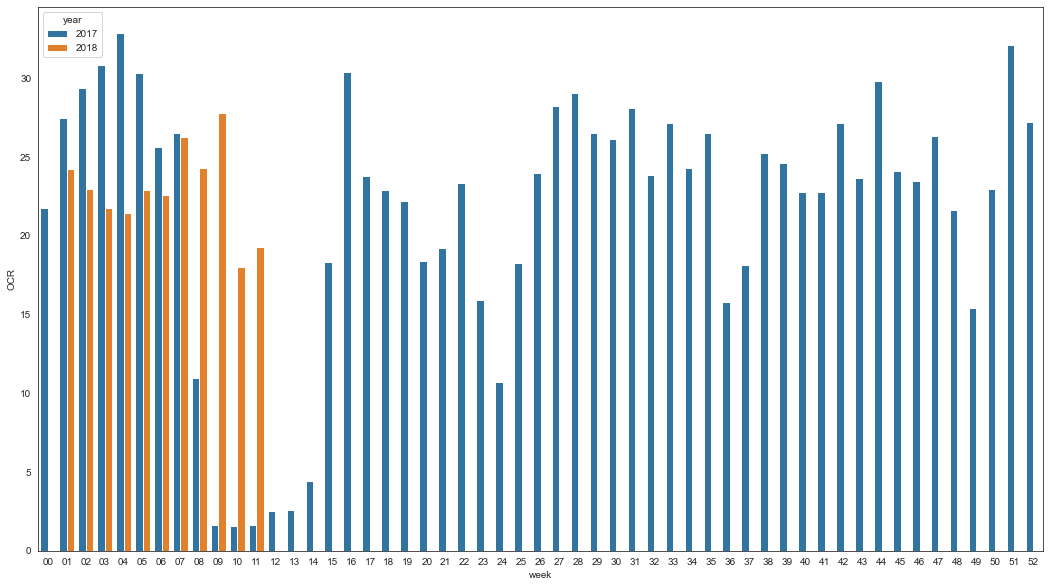

In [39]:
plt.subplots(figsize=(18, 10))
ax = sns.barplot(data=joint_order, x='week', y='OCR', hue='year')

If you combine the unit prices from the products dataframe with the unit price in orderlines, you can find if a discount has been applied into a product and how much is the difference. Find out which are the best visualisation to: 

2. Show the evolution of the average discount (in %) by each month

In [40]:
products.dtypes

sku                      object
name                     object
desc                     object
price                   float64
type                     object
max_price_orderlines    float64
dtype: object

In [41]:
products.isna().sum()

sku                         0
name                        0
desc                        7
price                     587
type                       50
max_price_orderlines    10237
dtype: int64

In [42]:
prdt = products[products['price'].isna() != True]
prdt

,sku,name,desc,price,type,max_price_orderlines
0,RAI0007,Silver Rain Design mStand Support,Aluminum support compatible with all MacBook,59.99,8696,NaN
1,APP0023,Apple Mac Keyboard Keypad Spanish,USB ultrathin keyboard Apple Mac Spanish.,59.00,13855401,NaN
2,APP0025,Mighty Mouse Apple Mouse for Mac,mouse Apple USB cable.,59.00,1387,NaN
3,APP0072,Apple Dock to USB Cable iPhone and iPod white,IPhone dock and USB Cable Apple iPod.,25.00,1230,NaN
4,KIN0007,Mac Memory Kingston 2GB 667MHz DDR2 SO-DIMM,2GB RAM Mac mini and iMac (2006/07) MacBook Pr...,34.99,1364,NaN
...,...,...,...,...,...,...
10574,BEL0376,Belkin Travel Support Apple Watch Black,compact and portable stand vertically or horiz...,29.99,12282,NaN
10575,THU0060,"Enroute Thule 14L Backpack MacBook 13 ""Black",Backpack with capacity of 14 liter compartment...,69.95,1392,NaN
10576,THU0061,"Enroute Thule 14L Backpack MacBook 13 ""Blue",Backpack with capacity of 14 liter compartment...,69.95,1392,NaN
10577,THU0062,"Enroute Thule 14L Backpack MacBook 13 ""Red",Backpack with capacity of 14 liter compartment...,69.95,1392,NaN


In [43]:
prdt.isna().sum()

sku                        0
name                       0
desc                       6
price                      0
type                      46
max_price_orderlines    9992
dtype: int64

In [44]:
orderlines.isna().sum()

id                  0
id_order            0
product_id          0
product_quantity    0
sku                 0
unit_price          0
date                0
total_price         0
check_orders        0
dtype: int64

In [45]:
orderlines.dtypes

id                           int64
id_order                     int64
product_id                   int64
product_quantity             int64
sku                         object
unit_price                 float64
date                datetime64[ns]
total_price                float64
check_orders                  bool
dtype: object

In [46]:
discount = orderlines.merge(prdt, how='left', on='sku')
discount.sample(20)

,id,id_order,product_id,product_quantity,sku,unit_price,date,total_price,check_orders,name,desc,price,type,max_price_orderlines
26318,1177530,322814,0,1,APP1651,861.42,2017-02-12 10:26:37,861.42,True,Apple iPhone 7 128GB Gold Rosa,New Apple iPhone 7 128GB Rose Gold free,749.00,85641716,NaN
104140,1317715,389316,0,1,APP1664,660.33,2017-08-14 10:04:06,660.33,True,Apple iPhone 6s 32GB Gold,New 32GB iPhone 6S Libre.,529.00,24821716,NaN
30389,1185193,326197,0,1,CRU0051,149.99,2017-02-19 11:20:48,149.99,True,Crucial MX300 525GB SSD Disk,SSD 525GB SATA Hard Disk 3.0 (6Gb / s) for Mac...,158.66,12215397,NaN
97666,1306119,383792,0,1,APP1971,469.00,2017-07-29 18:43:43,469.00,True,Apple iPhone SE 128GB Space Gray,New iPhone screen 4-inch 128 GB free.,529.00,51601716,NaN
130980,1378400,412694,0,1,APP1663,520.33,2017-10-15 15:53:59,520.33,True,Apple iPhone 6s 32GB Silver,New 32GB iPhone 6S Libre.,529.00,24821716,NaN
12443,1149396,310873,0,1,APP1665,659.00,2017-01-17 11:02:24,659.00,True,32GB Apple iPhone 6s Rose Gold,New 32GB iPhone 6S Libre.,529.00,24821716,NaN
203806,1499604,464333,0,1,APP1966,359.00,2017-12-16 13:24:35,359.00,True,Apple iPhone 32GB Silver,New iPhone SE with 4-inch screen 32 free GB.,419.00,51601716,NaN
183381,1471301,453241,0,1,SPE0207,26.99,2017-12-01 14:43:28,26.99,True,Presidio Speck iPhone Case 8 Plus / 7 Plus / 6...,protective case with anti-impact polycarbonate...,29.95,11865403,NaN
216195,1523219,475459,0,1,APP1095,214.70,2017-12-28 20:47:53,214.70,True,Apple iPod Touch 32GB Blue,New 6th generation iPod Touch 32GB with 8 mega...,232.81,11821715,NaN
215770,1522406,475077,0,1,BEL0108,9.00,2017-12-28 16:09:39,9.00,True,Belkin Screen iPhone 3 Cases antihuellas SE / ...,Set of 3 Screen Protectors for iPhone SE / 5s / 5,12.99,13555403,NaN


In [47]:
discount.isna().sum()

id                           0
id_order                     0
product_id                   0
product_quantity             0
sku                          0
unit_price                   0
date                         0
total_price                  0
check_orders                 0
name                      8742
desc                      8754
price                     8742
type                      8924
max_price_orderlines    293743
dtype: int64

In [48]:
discount = discount[discount['price'].isna() != True]

In [49]:
discount.isna().sum()

id                           0
id_order                     0
product_id                   0
product_quantity             0
sku                          0
unit_price                   0
date                         0
total_price                  0
check_orders                 0
name                         0
desc                        12
price                        0
type                       182
max_price_orderlines    285001
dtype: int64

In [50]:
dscnt = discount[discount['price'] > discount['unit_price']]
dscnt

,id,id_order,product_id,product_quantity,sku,unit_price,date,total_price,check_orders,name,desc,price,type,max_price_orderlines
0,1119109,299539,0,1,OTT0133,18.99,2017-01-01 00:07:19,18.99,True,Otterbox iPhone Case Symmetry 2.0 SE / 5s / 5 ...,resistant cover and thin beveled edges for iPh...,34.99,11865403,NaN
1,1119110,299540,0,1,LGE0043,399.00,2017-01-01 00:19:45,399.00,True,"27UD58-B LG Monitor 27 ""4K UHD DisplayPort",Monitor for gamers and multimedia professional...,429.00,1296,NaN
2,1119111,299541,0,1,PAR0071,474.05,2017-01-01 00:20:57,474.05,True,Parrot Bebop 2 White + Command FLYPAD and FPV ...,cuadricóptero wireless remote control with 25 ...,699.00,11905404,NaN
3,1119112,299542,0,1,WDT0315,68.39,2017-01-01 00:51:40,68.39,True,"Blue WD 2TB Hard Drive 35 ""Mac and PC",Internal Hard Drive Western Digital 2TB 3.5-in...,79.00,12655397,NaN
4,1119113,299543,0,1,JBL0104,23.74,2017-01-01 01:06:38,23.74,True,Gray Bluetooth Speaker JBL GO,Compact Bluetooth Handsfree for iPhone iPad an...,29.90,5398,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
293738,1650199,527398,0,1,JBL0122,42.99,2018-03-14 13:57:25,42.99,True,JBL T450 BT Bluetooth Headset Black,Wireless headphones with folding design with 1...,49.95,5384,NaN
293739,1650200,527399,0,1,PAC0653,141.58,2018-03-14 13:57:34,141.58,True,Samsung SSD 850 expansion kit EVO 250GB + Data...,SSD upgrade kit 2008-2010 250 GB MacBook and M...,215.98,1433,NaN
293740,1650201,527400,0,2,APP0698,9.99,2018-03-14 13:57:41,19.98,True,Apple Lightning Cable Connector to USB 1m Whit...,Apple Lightning USB Cable 1 meter to charge an...,25.00,1230,NaN
293741,1650202,527388,0,1,BEZ0204,19.99,2018-03-14 13:58:01,19.99,True,"Be.ez LArobe Case Mix Macbook 12 ""Green",Macbook thin sheath 12 inches.,29.99,13835403,NaN


In [51]:
agg_discount = dscnt.assign(disc = dscnt['price'] - dscnt['unit_price'],
                            year = dscnt['date'].dt.strftime('%Y'),
                            month = dscnt['date'].dt.strftime('%b'))\
                    .groupby(['year', 'month'])\
                    .agg(ave_disc = ('disc','mean'))
agg_discount

ave_disc
year month          
2017 Apr       42.86
     Aug       48.43
     Dec       60.63
     Feb       40.00
     Jan       43.26
     Jul       56.96
     Jun       63.28
     Mar       45.93
     May       52.44
     Nov       62.55
     Oct       62.31
     Sep       62.81
2018 Feb       54.93
     Jan       74.10
     Mar       50.57

In [52]:
agg_discount.reset_index(inplace=True)

In [53]:
agg_discount.dtypes

year         object
month        object
ave_disc    float64
dtype: object

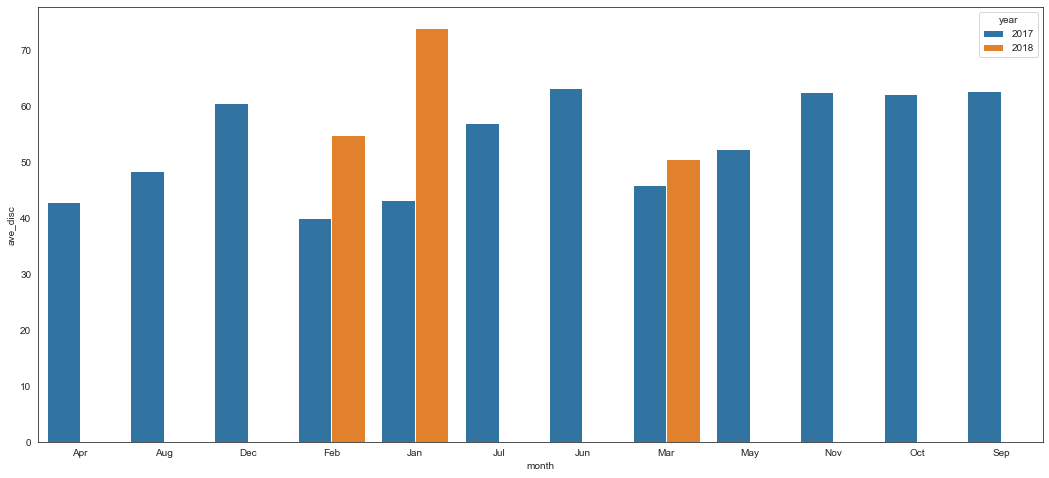

In [54]:
months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 
          'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
plt.subplots(figsize=(18, 8))
ax = sns.barplot(data=agg_discount, x='month', y='ave_disc', hue='year')#, order=months)

3. Show the top 30 products with the highest discounts in absolute values, on average.  

In [55]:
top30 = dscnt.assign(disc30 = dscnt['price'] - dscnt['unit_price'],
                     year = dscnt['date'].dt.strftime('%Y'))\
             .groupby(['year','sku'])\
             .agg(ave_disc30 = ('disc30','mean'))\
             .reset_index()\
             # .sort_values(['ave_disc30'], ascending=False)\
             # .head(30)
# top30.reset_index(inplace=True)
top30

,year,sku,ave_disc30
0,2017,8MO0001-A,22.04
1,2017,8MO0007,13.63
2,2017,8MO0008,13.28
3,2017,8MO0009,15.66
4,2017,8MO0010,14.21
...,...,...,...
10606,2018,ZAG0040,10.38
10607,2018,ZAG0041,10.00
10608,2018,ZAG0042,10.00
10609,2018,ZEP0007,24.00


In [56]:
top30_pyr = pd.concat([top30.query('year == "2017"').sort_values('ave_disc30', ascending=False).head(30), \
                       top30.query('year == "2018"').sort_values('ave_disc30', ascending=False).head(30)], axis=0)
top30_pyr

,year,sku,ave_disc30
4904,2017,PAC2122,1449.36
4507,2017,PAC1357,1408.96
4366,2017,PAC0874,1401.01
4667,2017,PAC1606,1383.68
4673,2017,PAC1612,1373.51
4679,2017,PAC1618,1370.01
4658,2017,PAC1597,1368.01
4278,2017,PAC0494,1364.01
4689,2017,PAC1628,1363.81
4273,2017,PAC0448,1348.51


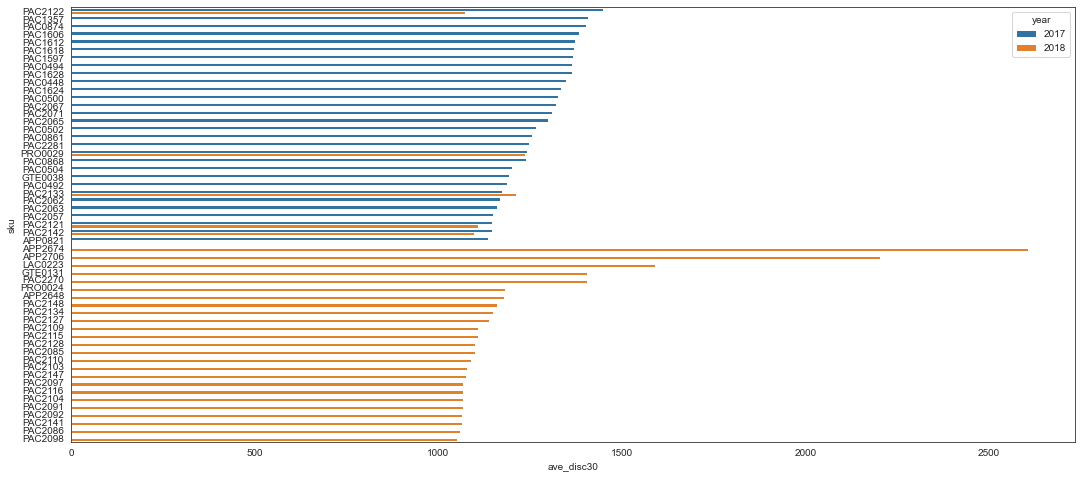

In [57]:
plt.subplots(figsize=(18, 8))
ax = sns.barplot(data=top30_pyr, x='ave_disc30', y='sku', hue='year')

In [58]:
top30 = dscnt.assign(disc30 = dscnt['price'] - dscnt['unit_price'])\
             .groupby(['sku'])\
             .agg(ave_disc30 = ('disc30','mean'))\
             .reset_index()\
             .sort_values(['ave_disc30'], ascending=False)\
             .head(30)
top30.reset_index(drop=True, inplace=True)
top30

,sku,ave_disc30
0,APP2674,2604.47
1,APP2706,2201.48
2,PAC1357,1408.96
3,GTE0131,1405.20
4,PAC2270,1403.80
5,PAC0874,1401.01
6,PAC1606,1383.68
7,PAC1612,1373.51
8,PAC1618,1370.01
9,PAC1597,1368.01


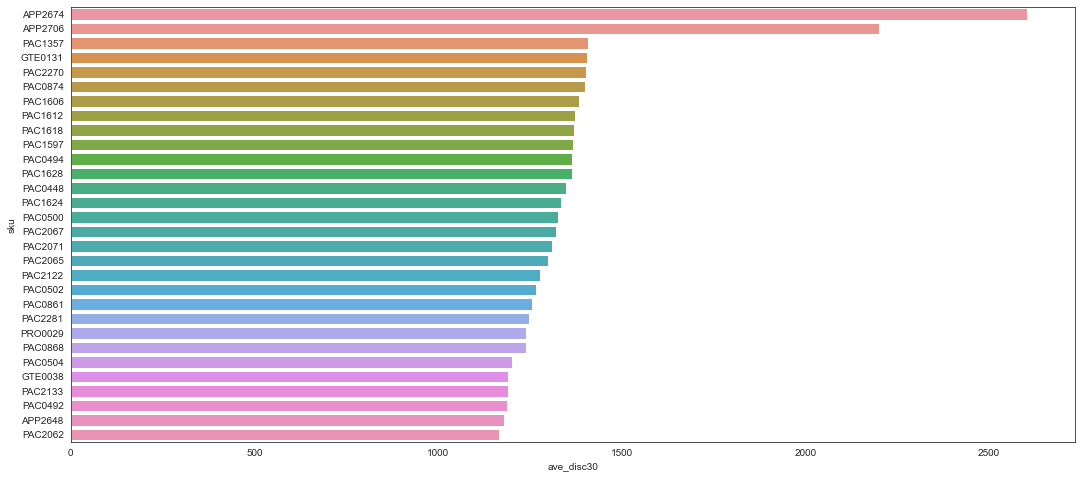

In [59]:
plt.subplots(figsize=(18, 8))
ax = sns.barplot(data=top30, x='ave_disc30', y='sku')

4. Show the distributions of discounts for each brand. Choose the discount measure you consider better to compare all brands. HINT: you can use the first 3 characters of the sku name to merge it with the brands table.

In [60]:
dscnt['sku'].str[:3]

0         OTT
1         LGE
2         PAR
3         WDT
4         JBL
         ... 
293738    JBL
293739    PAC
293740    APP
293741    BEZ
293742    APP
Name: sku, Length: 258977, dtype: object

In [61]:
brds = pd.read_csv('brands_clean.csv')

In [62]:
brand_discount = dscnt.assign(short = dscnt['sku'].str[:3],
                              disc = dscnt['price'] - dscnt['unit_price'])\
                      .merge(brds, how='left', on='short')\
                      # .groupby('long')\
                      # .agg(aveg_disc_brdt = ('disc','mean'))\
                      # # .reset_index(inplace=True)
brand_discount

,id,id_order,product_id,product_quantity,sku,unit_price,date,total_price,check_orders,name,desc,price,type,max_price_orderlines,short,disc,long
0,1119109,299539,0,1,OTT0133,18.99,2017-01-01 00:07:19,18.99,True,Otterbox iPhone Case Symmetry 2.0 SE / 5s / 5 ...,resistant cover and thin beveled edges for iPh...,34.99,11865403,NaN,OTT,16.00,Otterbox
1,1119110,299540,0,1,LGE0043,399.00,2017-01-01 00:19:45,399.00,True,"27UD58-B LG Monitor 27 ""4K UHD DisplayPort",Monitor for gamers and multimedia professional...,429.00,1296,NaN,LGE,30.00,LG
2,1119111,299541,0,1,PAR0071,474.05,2017-01-01 00:20:57,474.05,True,Parrot Bebop 2 White + Command FLYPAD and FPV ...,cuadricóptero wireless remote control with 25 ...,699.00,11905404,NaN,PAR,224.95,Parrot
3,1119112,299542,0,1,WDT0315,68.39,2017-01-01 00:51:40,68.39,True,"Blue WD 2TB Hard Drive 35 ""Mac and PC",Internal Hard Drive Western Digital 2TB 3.5-in...,79.00,12655397,NaN,WDT,10.61,Western Digital
4,1119113,299543,0,1,JBL0104,23.74,2017-01-01 01:06:38,23.74,True,Gray Bluetooth Speaker JBL GO,Compact Bluetooth Handsfree for iPhone iPad an...,29.90,5398,NaN,JBL,6.16,JBL
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
258972,1650199,527398,0,1,JBL0122,42.99,2018-03-14 13:57:25,42.99,True,JBL T450 BT Bluetooth Headset Black,Wireless headphones with folding design with 1...,49.95,5384,NaN,JBL,6.96,JBL
258973,1650200,527399,0,1,PAC0653,141.58,2018-03-14 13:57:34,141.58,True,Samsung SSD 850 expansion kit EVO 250GB + Data...,SSD upgrade kit 2008-2010 250 GB MacBook and M...,215.98,1433,NaN,PAC,74.40,Pack
258974,1650201,527400,0,2,APP0698,9.99,2018-03-14 13:57:41,19.98,True,Apple Lightning Cable Connector to USB 1m Whit...,Apple Lightning USB Cable 1 meter to charge an...,25.00,1230,NaN,APP,15.01,Apple
258975,1650202,527388,0,1,BEZ0204,19.99,2018-03-14 13:58:01,19.99,True,"Be.ez LArobe Case Mix Macbook 12 ""Green",Macbook thin sheath 12 inches.,29.99,13835403,NaN,BEZ,10.00,Be.ez


In [63]:
brand_discount_corr = brand_discount[brand_discount['short'].isin(list(brds.short.unique()))]
brand_discount_corr

,id,id_order,product_id,product_quantity,sku,unit_price,date,total_price,check_orders,name,desc,price,type,max_price_orderlines,short,disc,long
0,1119109,299539,0,1,OTT0133,18.99,2017-01-01 00:07:19,18.99,True,Otterbox iPhone Case Symmetry 2.0 SE / 5s / 5 ...,resistant cover and thin beveled edges for iPh...,34.99,11865403,NaN,OTT,16.00,Otterbox
1,1119110,299540,0,1,LGE0043,399.00,2017-01-01 00:19:45,399.00,True,"27UD58-B LG Monitor 27 ""4K UHD DisplayPort",Monitor for gamers and multimedia professional...,429.00,1296,NaN,LGE,30.00,LG
2,1119111,299541,0,1,PAR0071,474.05,2017-01-01 00:20:57,474.05,True,Parrot Bebop 2 White + Command FLYPAD and FPV ...,cuadricóptero wireless remote control with 25 ...,699.00,11905404,NaN,PAR,224.95,Parrot
3,1119112,299542,0,1,WDT0315,68.39,2017-01-01 00:51:40,68.39,True,"Blue WD 2TB Hard Drive 35 ""Mac and PC",Internal Hard Drive Western Digital 2TB 3.5-in...,79.00,12655397,NaN,WDT,10.61,Western Digital
4,1119113,299543,0,1,JBL0104,23.74,2017-01-01 01:06:38,23.74,True,Gray Bluetooth Speaker JBL GO,Compact Bluetooth Handsfree for iPhone iPad an...,29.90,5398,NaN,JBL,6.16,JBL
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
258972,1650199,527398,0,1,JBL0122,42.99,2018-03-14 13:57:25,42.99,True,JBL T450 BT Bluetooth Headset Black,Wireless headphones with folding design with 1...,49.95,5384,NaN,JBL,6.96,JBL
258973,1650200,527399,0,1,PAC0653,141.58,2018-03-14 13:57:34,141.58,True,Samsung SSD 850 expansion kit EVO 250GB + Data...,SSD upgrade kit 2008-2010 250 GB MacBook and M...,215.98,1433,NaN,PAC,74.40,Pack
258974,1650201,527400,0,2,APP0698,9.99,2018-03-14 13:57:41,19.98,True,Apple Lightning Cable Connector to USB 1m Whit...,Apple Lightning USB Cable 1 meter to charge an...,25.00,1230,NaN,APP,15.01,Apple
258975,1650202,527388,0,1,BEZ0204,19.99,2018-03-14 13:58:01,19.99,True,"Be.ez LArobe Case Mix Macbook 12 ""Green",Macbook thin sheath 12 inches.,29.99,13835403,NaN,BEZ,10.00,Be.ez


In [64]:
brand_discount.reset_index()

,index,id,id_order,product_id,product_quantity,sku,unit_price,date,total_price,check_orders,name,desc,price,type,max_price_orderlines,short,disc,long
0,0,1119109,299539,0,1,OTT0133,18.99,2017-01-01 00:07:19,18.99,True,Otterbox iPhone Case Symmetry 2.0 SE / 5s / 5 ...,resistant cover and thin beveled edges for iPh...,34.99,11865403,NaN,OTT,16.00,Otterbox
1,1,1119110,299540,0,1,LGE0043,399.00,2017-01-01 00:19:45,399.00,True,"27UD58-B LG Monitor 27 ""4K UHD DisplayPort",Monitor for gamers and multimedia professional...,429.00,1296,NaN,LGE,30.00,LG
2,2,1119111,299541,0,1,PAR0071,474.05,2017-01-01 00:20:57,474.05,True,Parrot Bebop 2 White + Command FLYPAD and FPV ...,cuadricóptero wireless remote control with 25 ...,699.00,11905404,NaN,PAR,224.95,Parrot
3,3,1119112,299542,0,1,WDT0315,68.39,2017-01-01 00:51:40,68.39,True,"Blue WD 2TB Hard Drive 35 ""Mac and PC",Internal Hard Drive Western Digital 2TB 3.5-in...,79.00,12655397,NaN,WDT,10.61,Western Digital
4,4,1119113,299543,0,1,JBL0104,23.74,2017-01-01 01:06:38,23.74,True,Gray Bluetooth Speaker JBL GO,Compact Bluetooth Handsfree for iPhone iPad an...,29.90,5398,NaN,JBL,6.16,JBL
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
258972,258972,1650199,527398,0,1,JBL0122,42.99,2018-03-14 13:57:25,42.99,True,JBL T450 BT Bluetooth Headset Black,Wireless headphones with folding design with 1...,49.95,5384,NaN,JBL,6.96,JBL
258973,258973,1650200,527399,0,1,PAC0653,141.58,2018-03-14 13:57:34,141.58,True,Samsung SSD 850 expansion kit EVO 250GB + Data...,SSD upgrade kit 2008-2010 250 GB MacBook and M...,215.98,1433,NaN,PAC,74.40,Pack
258974,258974,1650201,527400,0,2,APP0698,9.99,2018-03-14 13:57:41,19.98,True,Apple Lightning Cable Connector to USB 1m Whit...,Apple Lightning USB Cable 1 meter to charge an...,25.00,1230,NaN,APP,15.01,Apple
258975,258975,1650202,527388,0,1,BEZ0204,19.99,2018-03-14 13:58:01,19.99,True,"Be.ez LArobe Case Mix Macbook 12 ""Green",Macbook thin sheath 12 inches.,29.99,13835403,NaN,BEZ,10.00,Be.ez


In [65]:
brand_discount

,id,id_order,product_id,product_quantity,sku,unit_price,date,total_price,check_orders,name,desc,price,type,max_price_orderlines,short,disc,long
0,1119109,299539,0,1,OTT0133,18.99,2017-01-01 00:07:19,18.99,True,Otterbox iPhone Case Symmetry 2.0 SE / 5s / 5 ...,resistant cover and thin beveled edges for iPh...,34.99,11865403,NaN,OTT,16.00,Otterbox
1,1119110,299540,0,1,LGE0043,399.00,2017-01-01 00:19:45,399.00,True,"27UD58-B LG Monitor 27 ""4K UHD DisplayPort",Monitor for gamers and multimedia professional...,429.00,1296,NaN,LGE,30.00,LG
2,1119111,299541,0,1,PAR0071,474.05,2017-01-01 00:20:57,474.05,True,Parrot Bebop 2 White + Command FLYPAD and FPV ...,cuadricóptero wireless remote control with 25 ...,699.00,11905404,NaN,PAR,224.95,Parrot
3,1119112,299542,0,1,WDT0315,68.39,2017-01-01 00:51:40,68.39,True,"Blue WD 2TB Hard Drive 35 ""Mac and PC",Internal Hard Drive Western Digital 2TB 3.5-in...,79.00,12655397,NaN,WDT,10.61,Western Digital
4,1119113,299543,0,1,JBL0104,23.74,2017-01-01 01:06:38,23.74,True,Gray Bluetooth Speaker JBL GO,Compact Bluetooth Handsfree for iPhone iPad an...,29.90,5398,NaN,JBL,6.16,JBL
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
258972,1650199,527398,0,1,JBL0122,42.99,2018-03-14 13:57:25,42.99,True,JBL T450 BT Bluetooth Headset Black,Wireless headphones with folding design with 1...,49.95,5384,NaN,JBL,6.96,JBL
258973,1650200,527399,0,1,PAC0653,141.58,2018-03-14 13:57:34,141.58,True,Samsung SSD 850 expansion kit EVO 250GB + Data...,SSD upgrade kit 2008-2010 250 GB MacBook and M...,215.98,1433,NaN,PAC,74.40,Pack
258974,1650201,527400,0,2,APP0698,9.99,2018-03-14 13:57:41,19.98,True,Apple Lightning Cable Connector to USB 1m Whit...,Apple Lightning USB Cable 1 meter to charge an...,25.00,1230,NaN,APP,15.01,Apple
258975,1650202,527388,0,1,BEZ0204,19.99,2018-03-14 13:58:01,19.99,True,"Be.ez LArobe Case Mix Macbook 12 ""Green",Macbook thin sheath 12 inches.,29.99,13835403,NaN,BEZ,10.00,Be.ez


In [66]:
brand_discount.isnull().sum()

id                           0
id_order                     0
product_id                   0
product_quantity             0
sku                          0
unit_price                   0
date                         0
total_price                  0
check_orders                 0
name                         0
desc                        12
price                        0
type                        91
max_price_orderlines    258977
short                        0
disc                         0
long                       189
dtype: int64

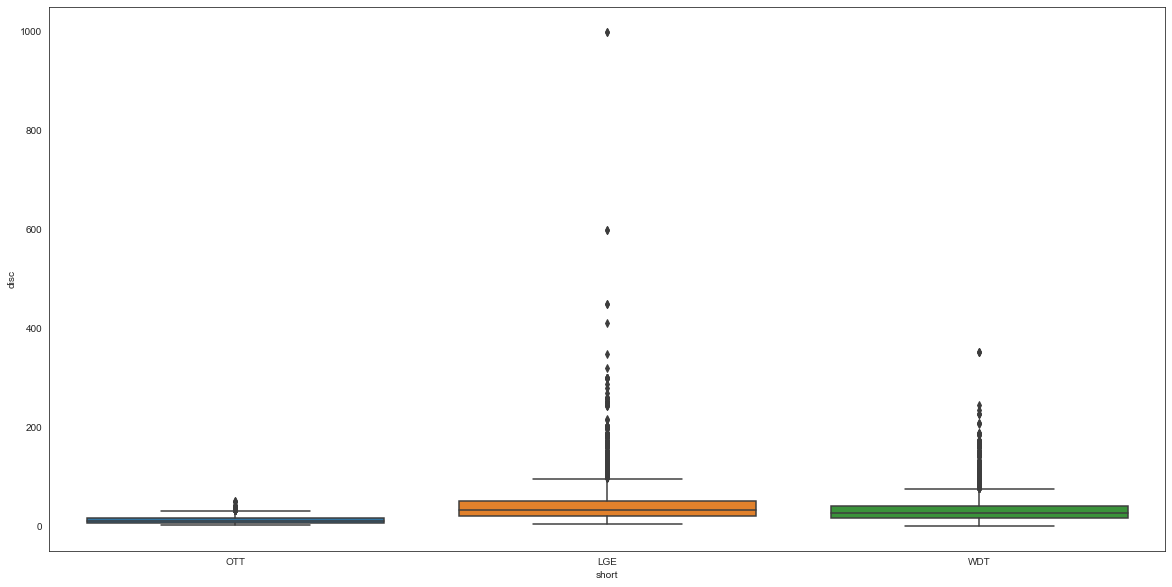

In [72]:
plt.figure(figsize=(20, 10))
ax = sns.boxplot(data=brand_discount_corr[brand_discount_corr['short'].isin(['OTT', 'LGE', 'WDT'])], y='disc', x='short')